In [ ]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19
#Clasificar EEG de habla imaginada con LSTM

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072].values
y = datos.iloc[:, 3072].values

num_classes = 6
n_samples = len(y)
print(x.shape)
print(y.shape)
print(n_samples)

(132, 3072)
(132,)
132


In [3]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [4]:
#convertir de 2D a 3D
x = x.reshape((n_samples, 512, 6))
print(x.shape)

(132, 512, 6)


In [5]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
model = models.Sequential()
model.add(layers.LSTM(32, input_shape=(512, 6)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
Total params: 5,190
Trainable params: 5,190
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 40, batch_size = 33, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/40
99/99 [==============================] - 8s 80ms/sample - loss: 1.7820 - acc: 0.1616 - val_loss: 1.8132 - val_acc: 0.1212
Epoch 2/40
99/99 [==============================] - 6s 58ms/sample - loss: 1.7755 - acc: 0.2424 - val_loss: 1.8149 - val_acc: 0.0909
Epoch 3/40
99/99 [==============================] - 6s 60ms/sample - loss: 1.7745 - acc: 0.2121 - val_loss: 1.8173 - val_acc: 0.0909
Epoch 4/40
99/99 [==============================] - 6s 58ms/sample - loss: 1.7723 - acc: 0.2525 - val_loss: 1.8196 - val_acc: 0.0909
Epoch 5/40
99/99 [==============================] - 6s 59ms/sample - loss: 1.7599 - acc: 0.2323 - val_loss: 1.8220 - val_acc: 0.0909
Epoch 6/40
99/99 [==============================] - 6s 59ms/sample - loss: 1.7586 - acc: 0.2222 - val_loss: 1.8247 - val_acc: 0.1212
Epoch 7/40
99/99 [==============================] - 6s 63ms/sample - loss: 1.7587 - acc: 0.2727 - val_loss: 1.8276 - val_acc: 0.1212
Epoch 8/40
99/99 [=======

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 2s 46ms/sample - loss: 2.0421 - acc: 0.0606
Test loss: 2.042050903493708
Test accuracy: 0.060606062


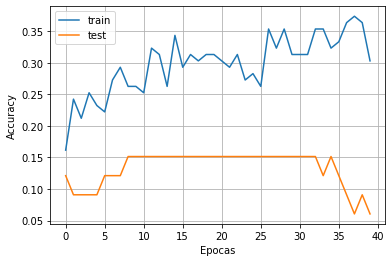

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

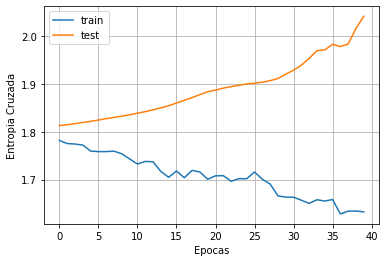

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()